In [1]:
# ライブラリの読み込み
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# グラフをインラインで表示させる
%matplotlib inline

In [2]:
# データ読み込み
train_1 = pd.read_csv('train.csv')
test_1 = pd.read_csv('test.csv')
train_1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print("train shape:{}".format(train_1.shape))
print("test  shape:{}".format(test_1.shape))

train shape:(1460, 81)
test  shape:(1459, 80)


In [4]:
print(train_1.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

(array([   5.,   11.,   13.,   61.,   58.,  126.,  165.,  180.,  122.,
         130.,  121.,   78.,   61.,   64.,   49.,   36.,   36.,   25.,
          13.,   25.,   16.,   11.,    4.,   11.,    9.,    5.,    4.,
           4.,    4.,    2.,    1.,    1.,    1.,    0.,    1.,    0.,
           2.,    0.,    1.,    0.,    2.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    2.]),
 array([  34900.,   49302.,   63704.,   78106.,   92508.,  106910.,
         121312.,  135714.,  150116.,  164518.,  178920.,  193322.,
         207724.,  222126.,  236528.,  250930.,  265332.,  279734.,
         294136.,  308538.,  322940.,  337342.,  351744.,  366146.,
         380548.,  394950.,  409352.,  423754.,  438156.,  452558.,
         466960.,  481362.,  495764.,  510166.,  524568.,  538970.,
         553372.,  567774.,  582176.,  596578.,  610980.,  625382.,
         639784.,  654186.,  668588.,  682990.,  697392.,  711794.,
         726196.,  740598.,  755000.]),
 <a list of 50 P

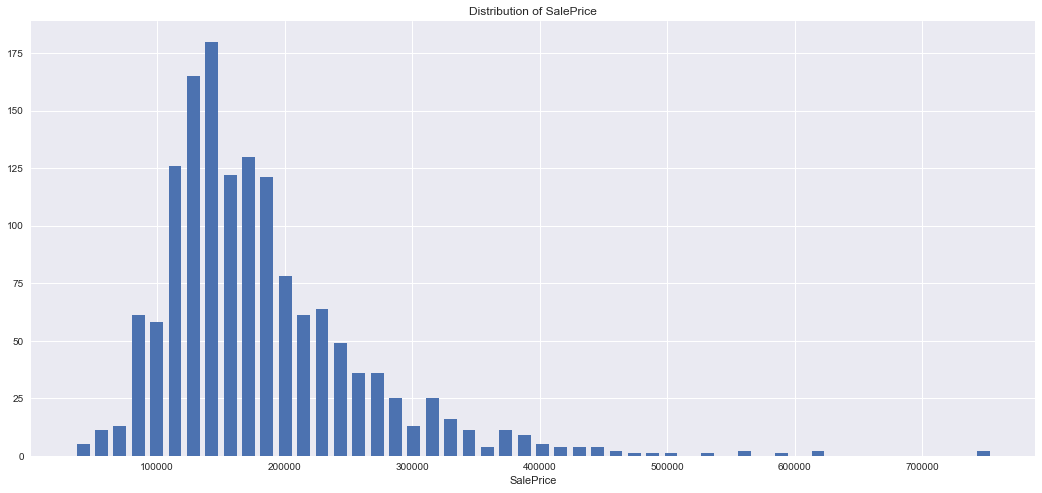

In [5]:
var='SalePrice'
plt.figure(figsize=(18,8)) #figsize
plt.xlabel(var) # x軸のラベルを表示
plt.title("Distribution of "+ var)
plt.hist(train_1[var],bins=50,rwidth=0.7)

<Container object of 81 artists>

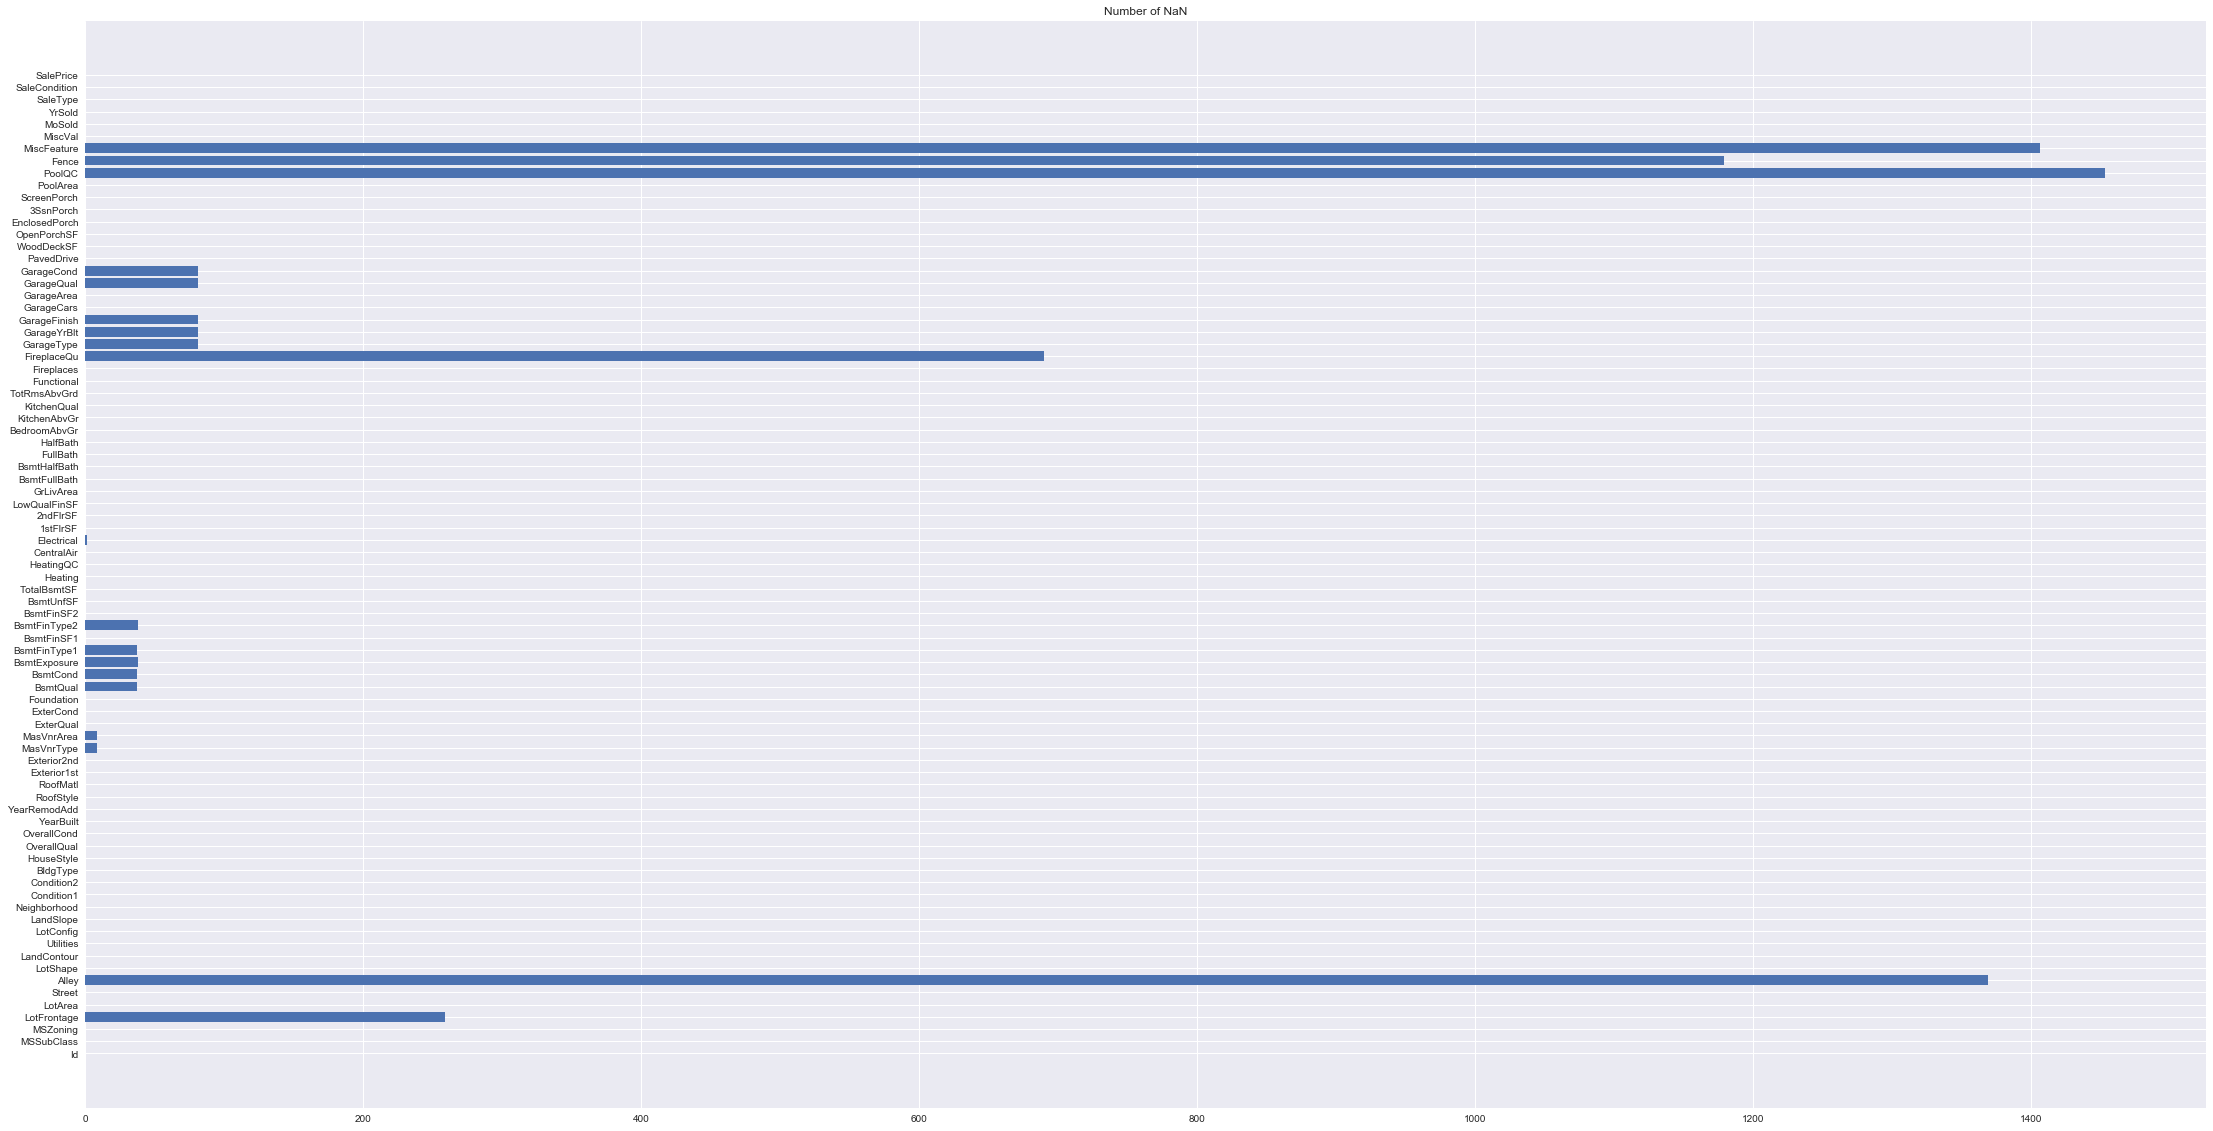

In [6]:
plt.figure(figsize=(38,20)) #figsize
plt.title("Number of NaN")
plt.barh(np.arange(train_1.shape[1]), train_1.isnull().sum(), tick_label=train_1.columns)

In [7]:
# 欠損値が500以上ある説明変数を除外
column_mask = (train_1.isnull().sum()<500).values
train_2 = train_1.iloc[:,column_mask]
test_column_mask = list(train_1.columns[column_mask])
test_column_mask.remove('SalePrice')
test_2 = test_1[test_column_mask]

In [8]:
# 定量的・定性的データの仕分け
num_col = []
str_col = []
for col in train_2.columns:
    if (type(train_2.loc[0,col]) == str):
        str_col.append(col)
    else:
        num_col.append(col)

In [9]:
print(num_col)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [10]:
print(str_col)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


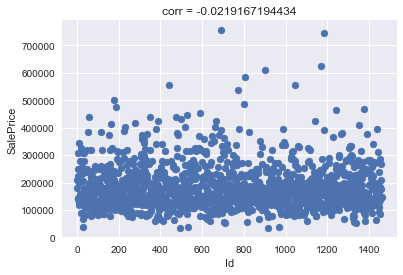

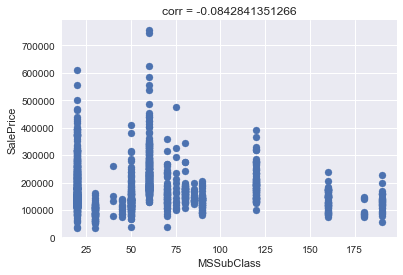

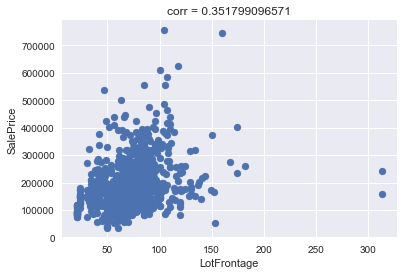

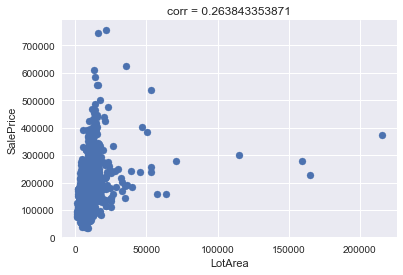

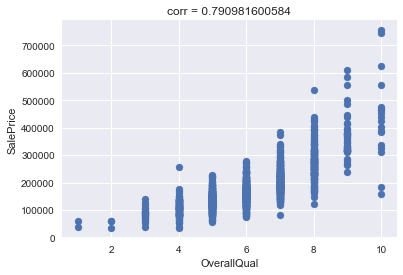

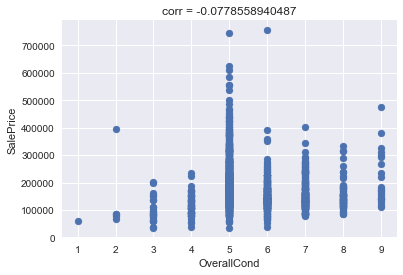

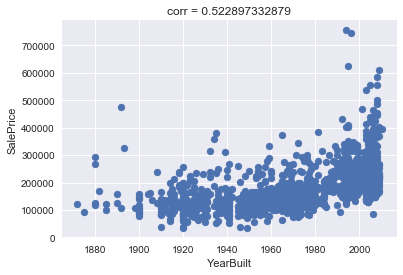

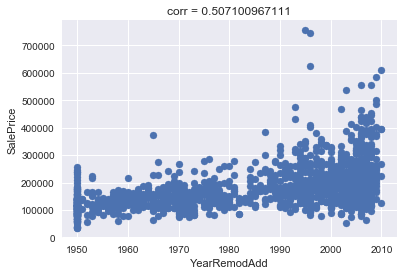

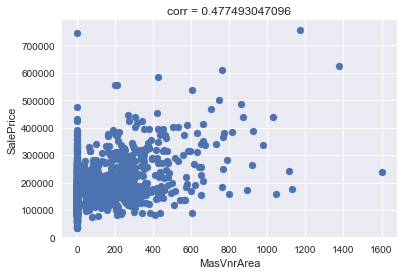

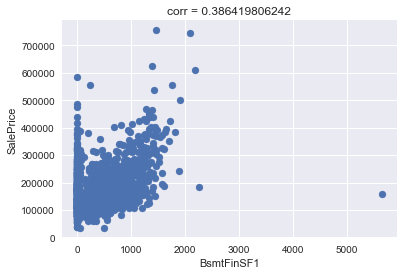

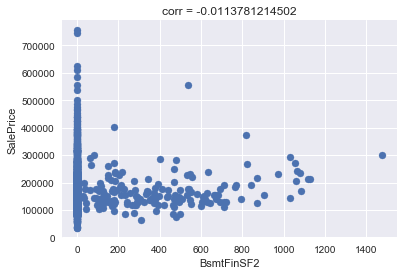

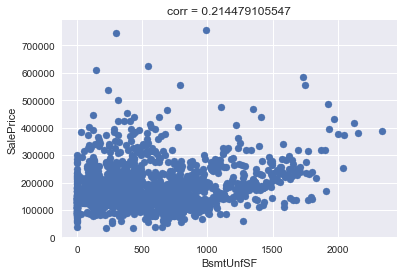

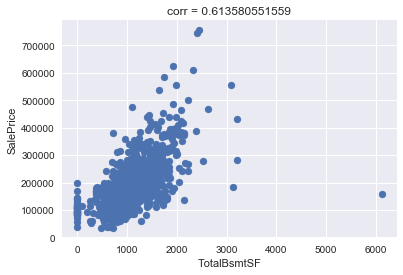

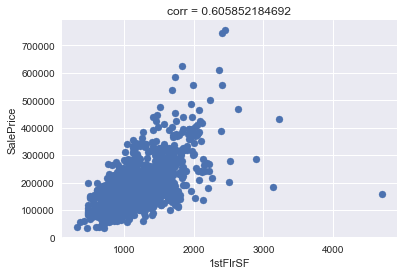

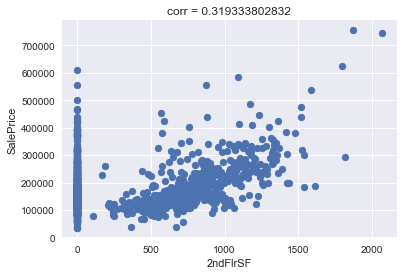

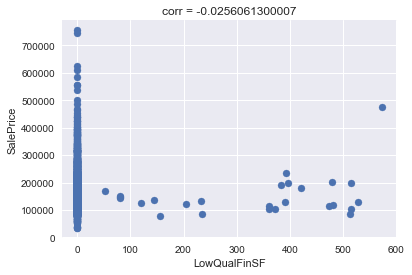

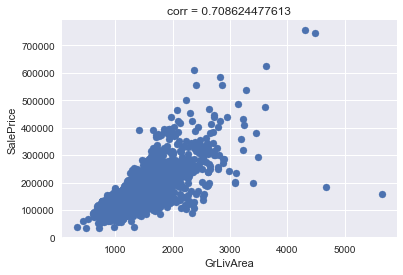

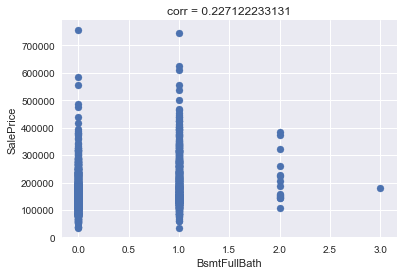

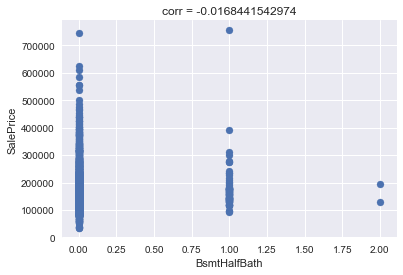

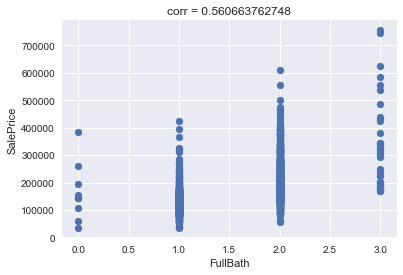

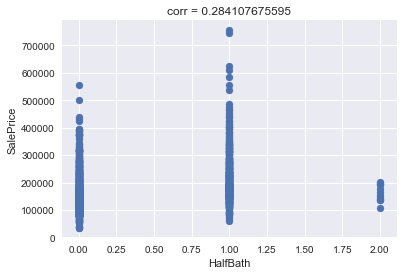

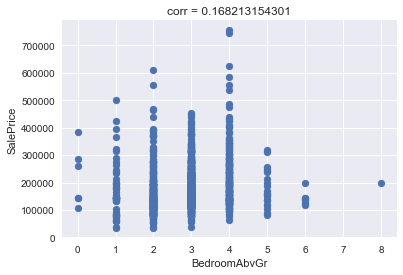

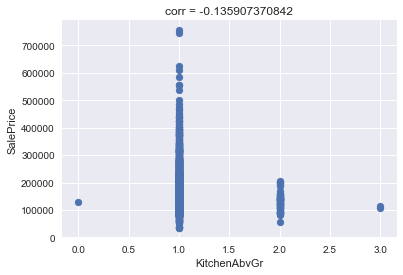

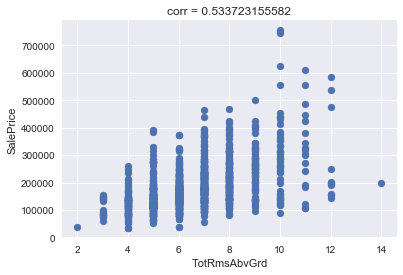

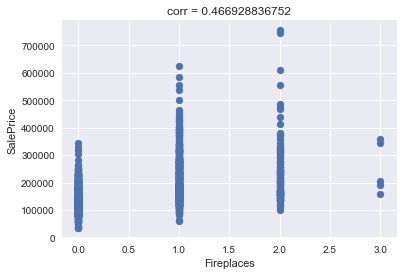

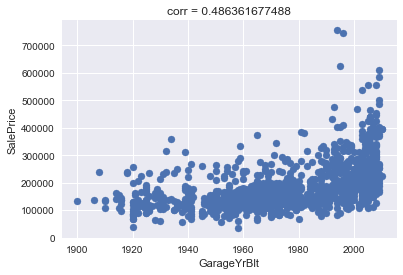

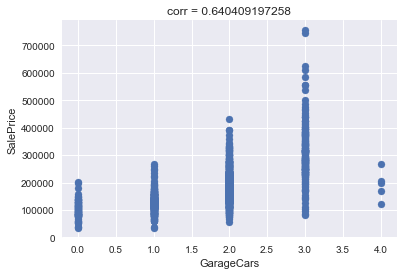

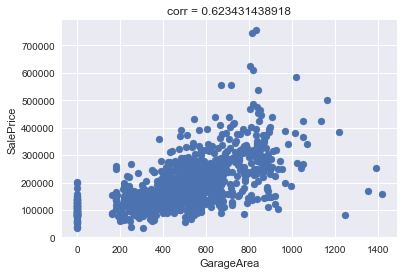

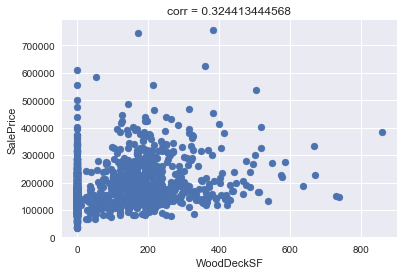

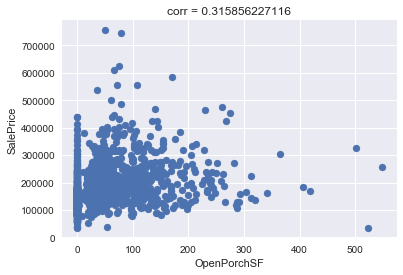

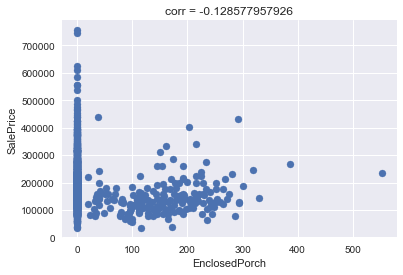

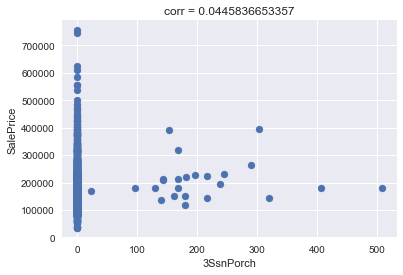

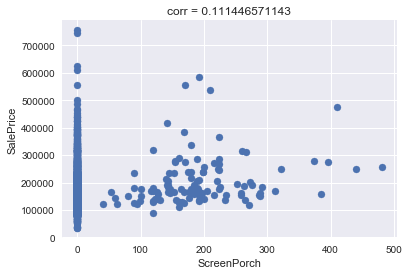

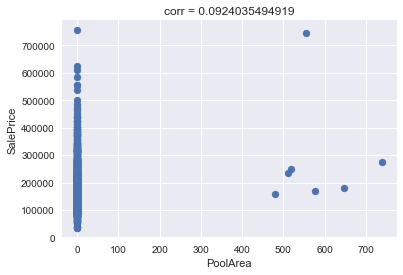

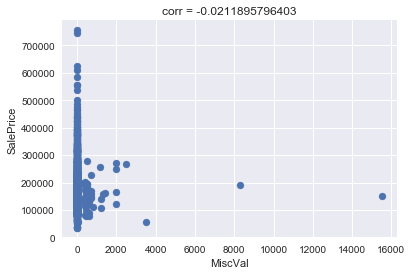

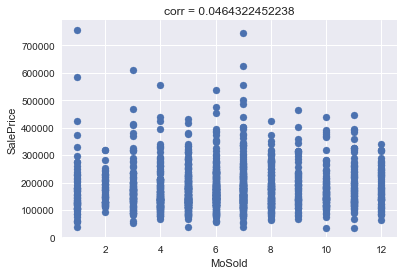

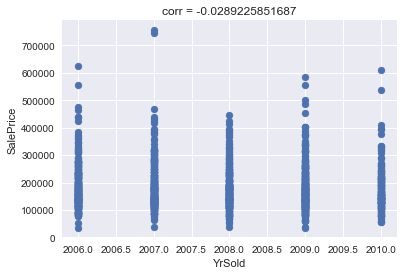

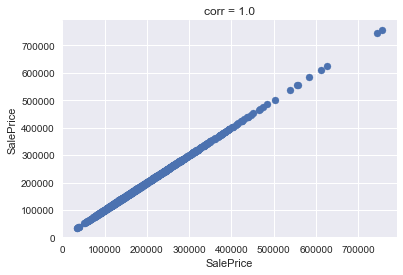

In [11]:
# 数量的データの分布
def calc_corr(x, y):
    z = pd.concat([x, y], axis = 1)
    corr = z.corr()
    return corr.iloc[0,1]
    
for col in num_col:
    plt.scatter(train_2[col],train_2['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title("corr = " +str(calc_corr(train_2[col],train_2['SalePrice'])))
    plt.show()

755000


/Users/yukari/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


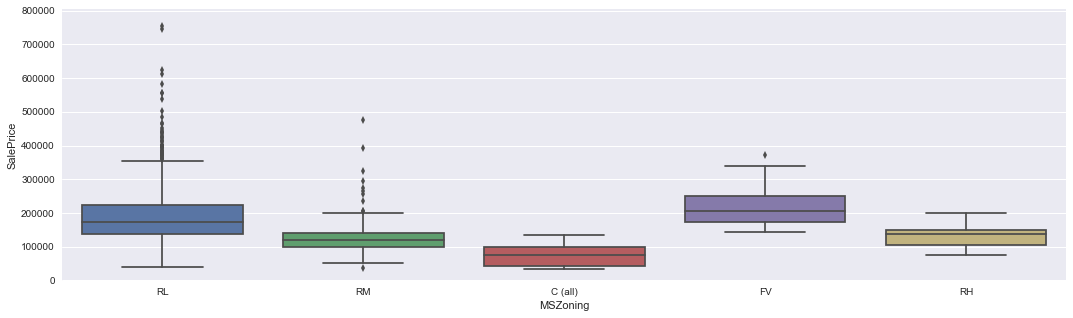

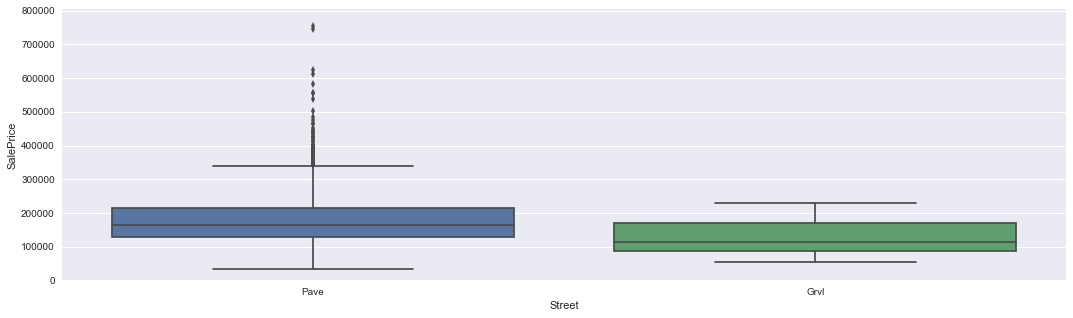

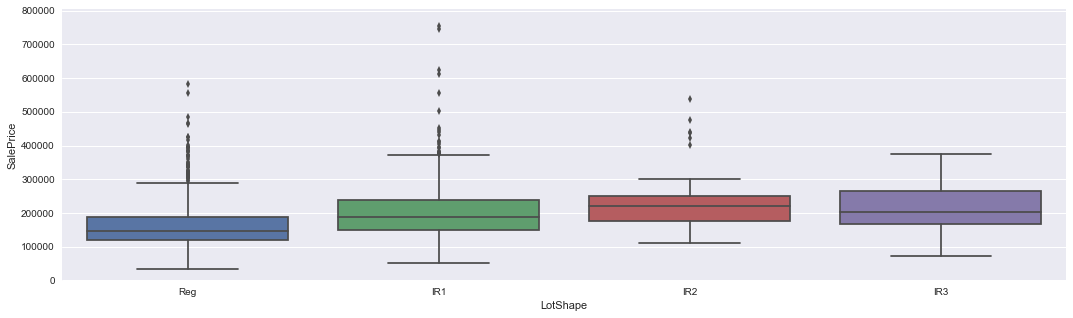

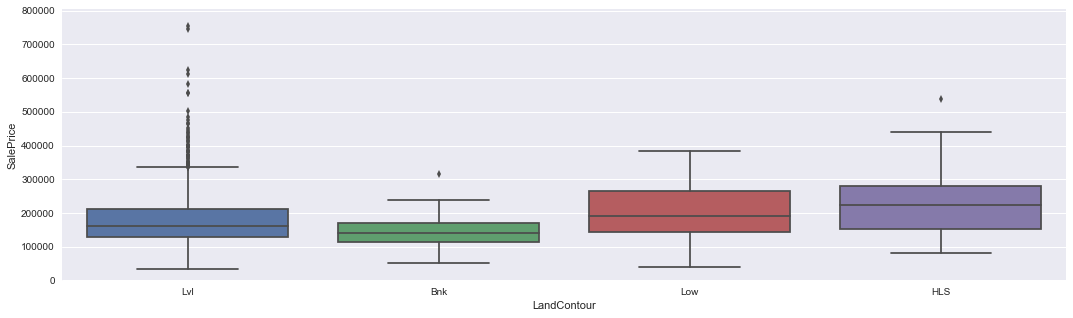

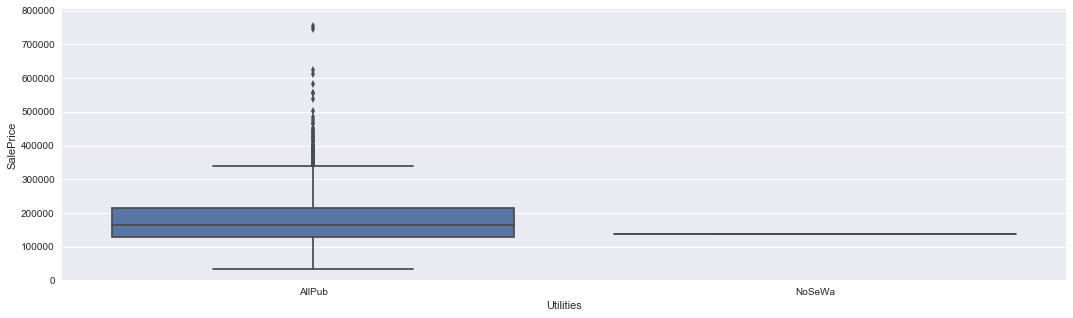

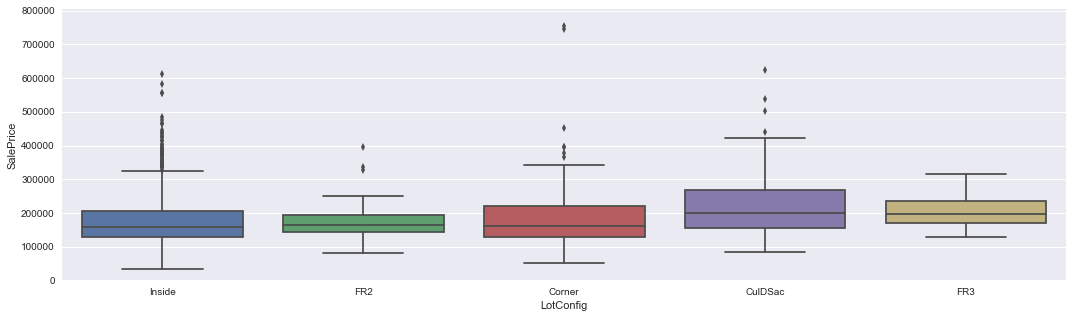

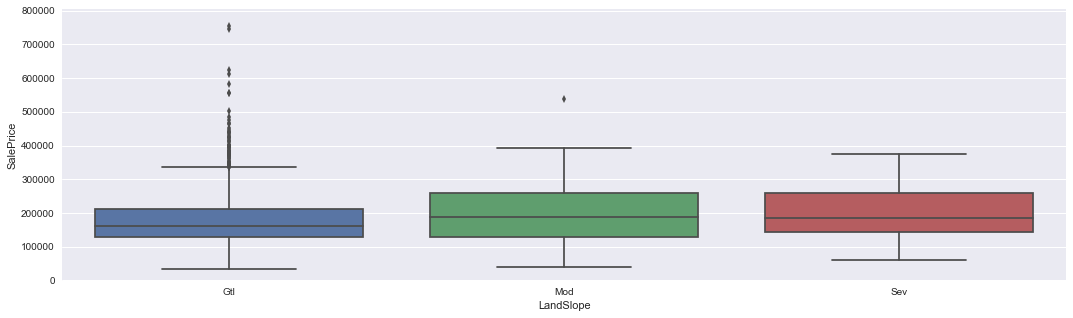

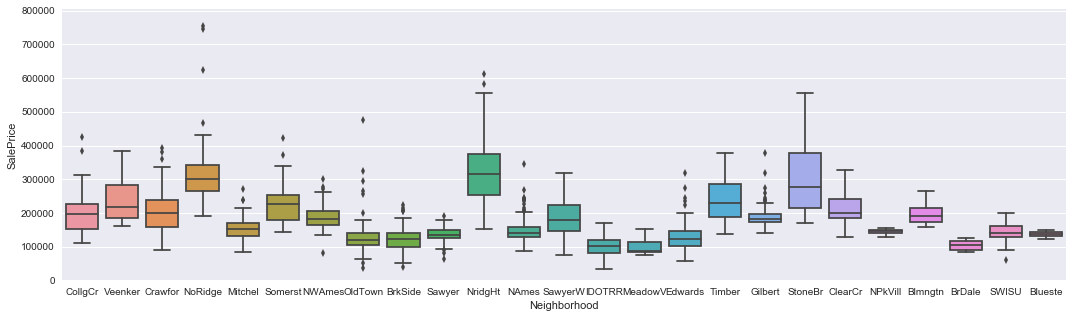

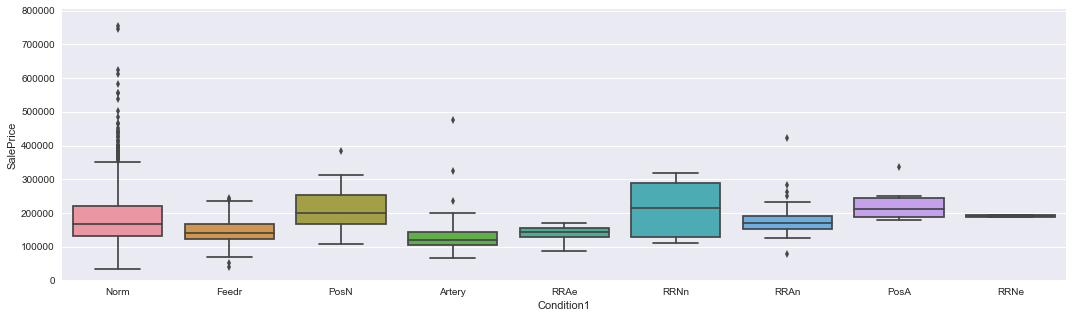

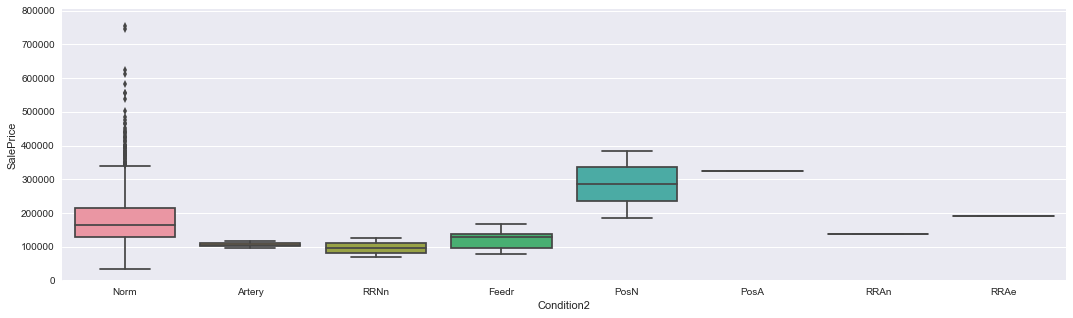

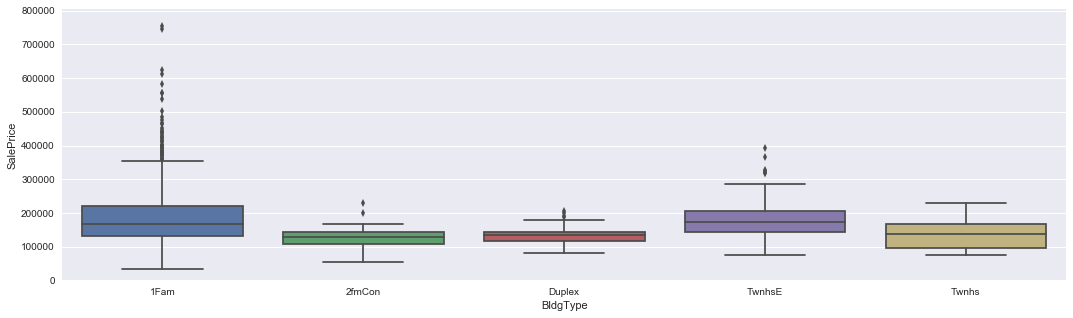

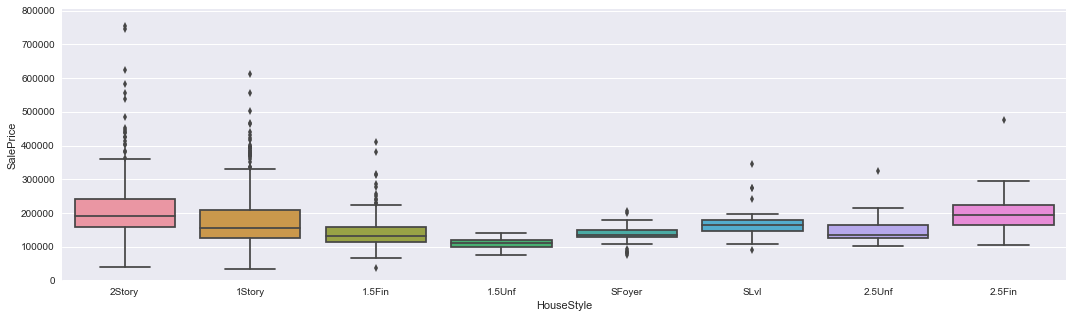

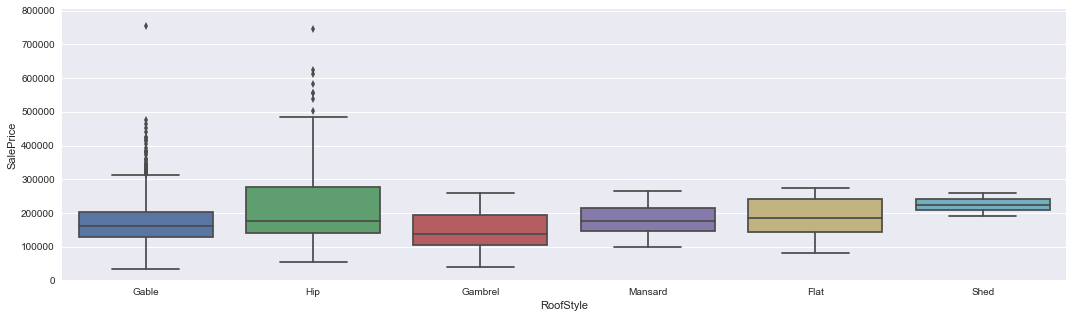

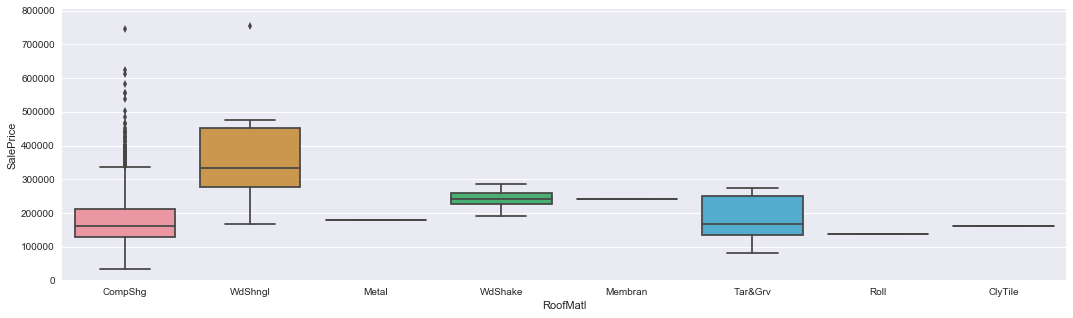

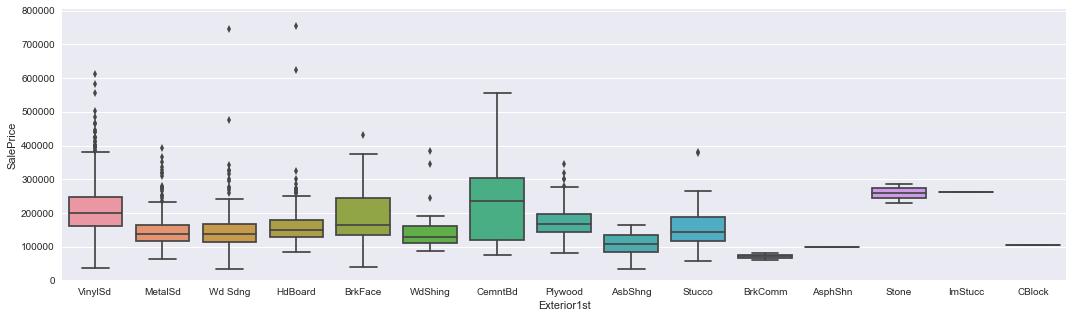

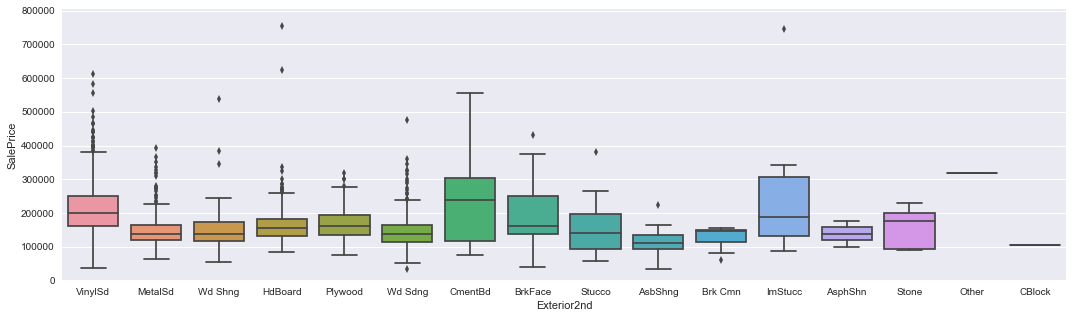

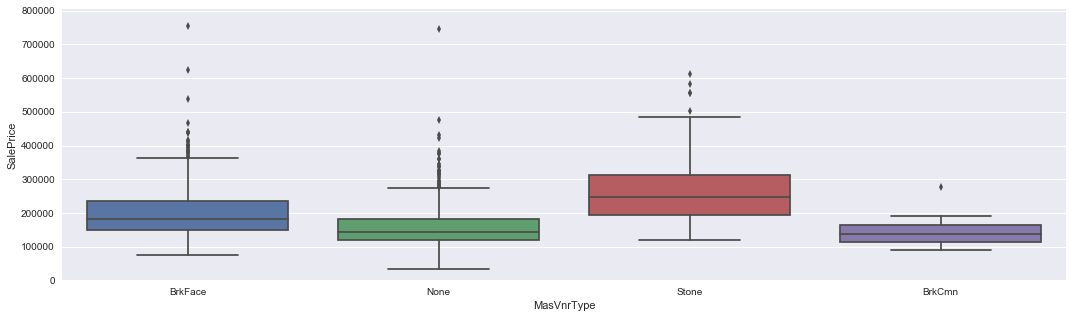

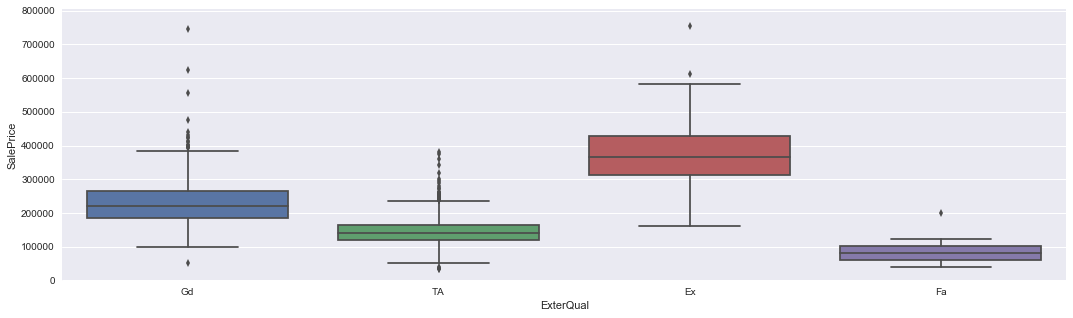

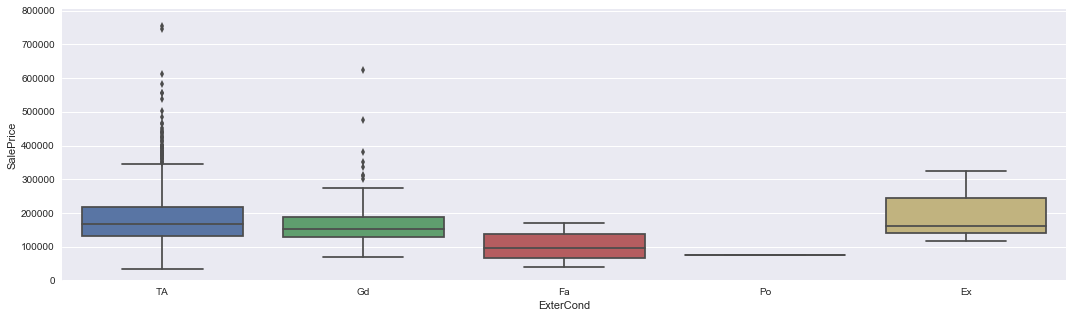

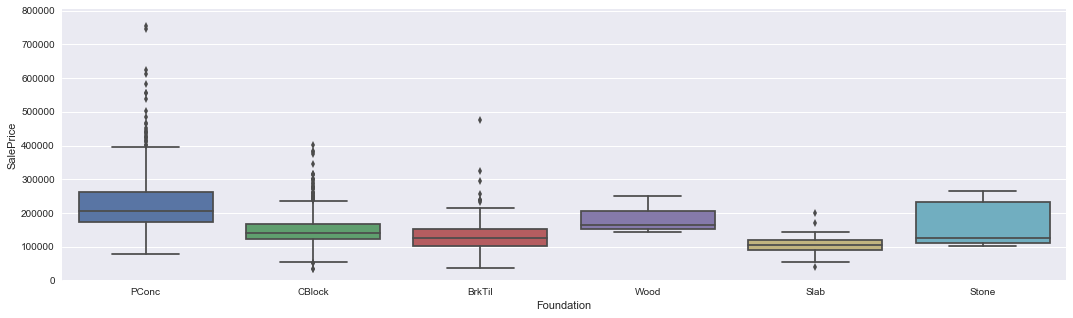

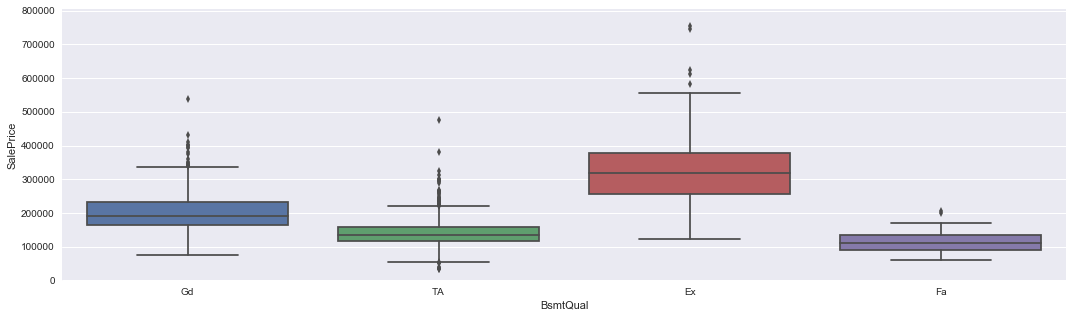

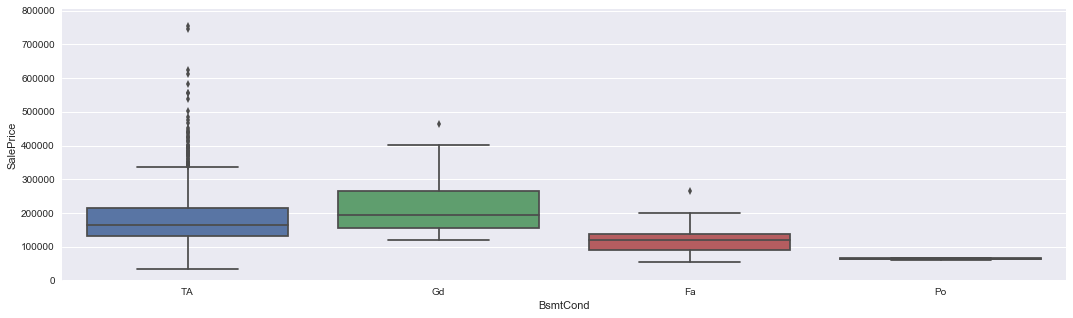

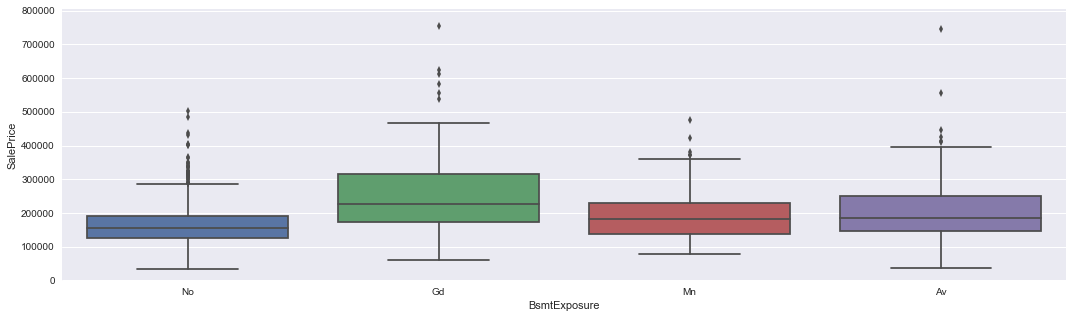

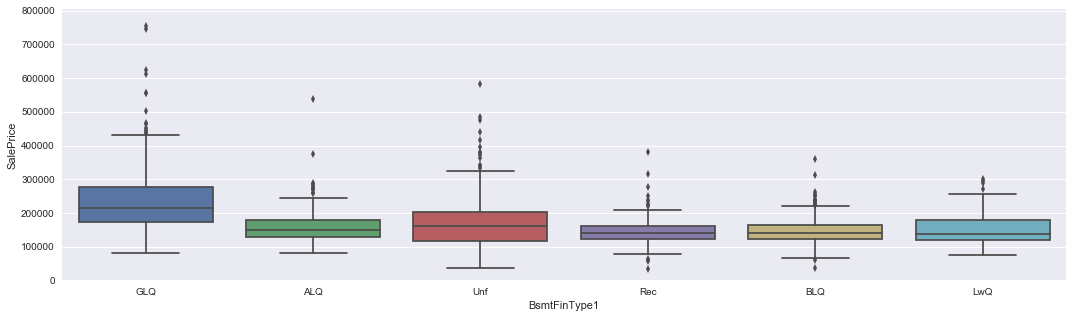

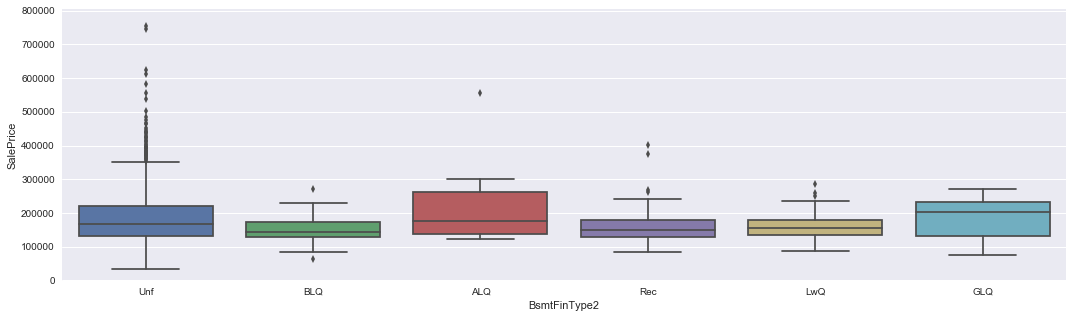

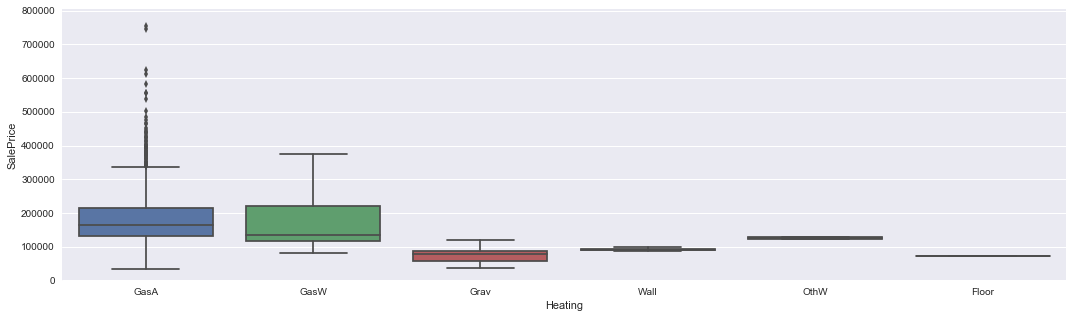

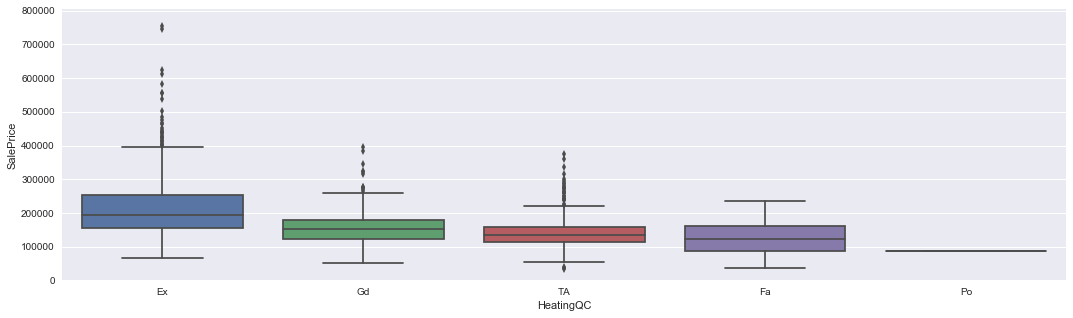

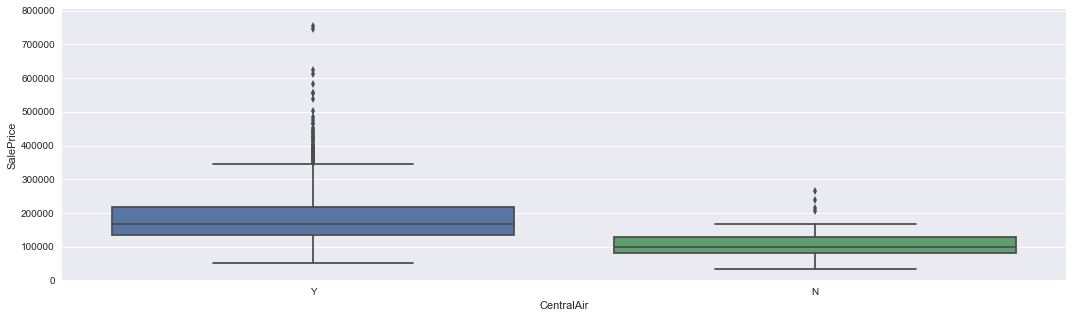

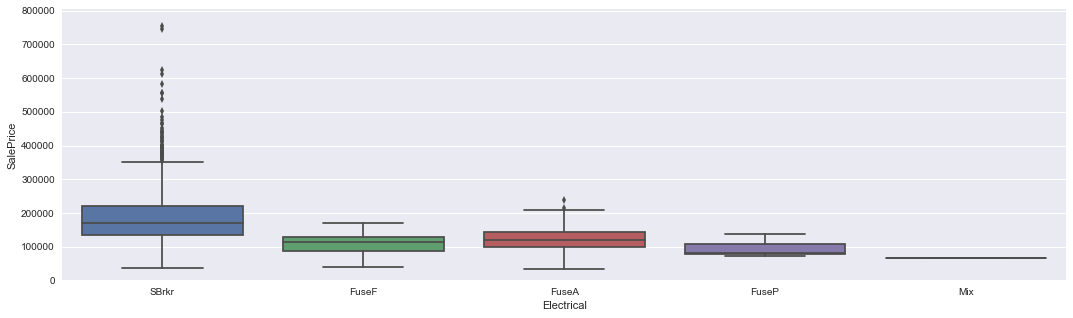

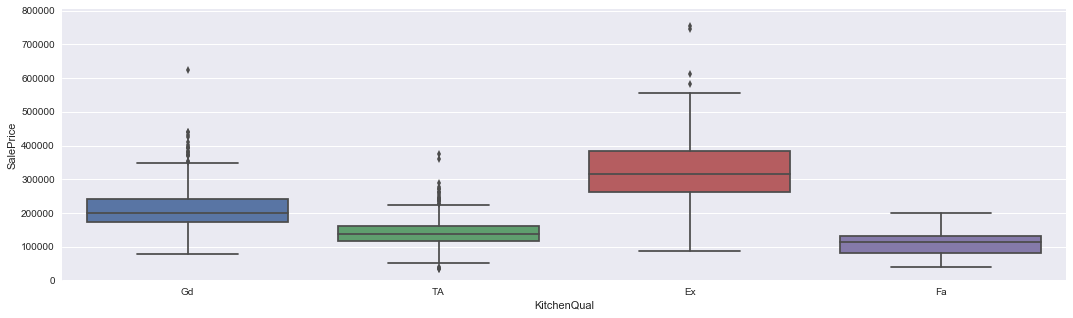

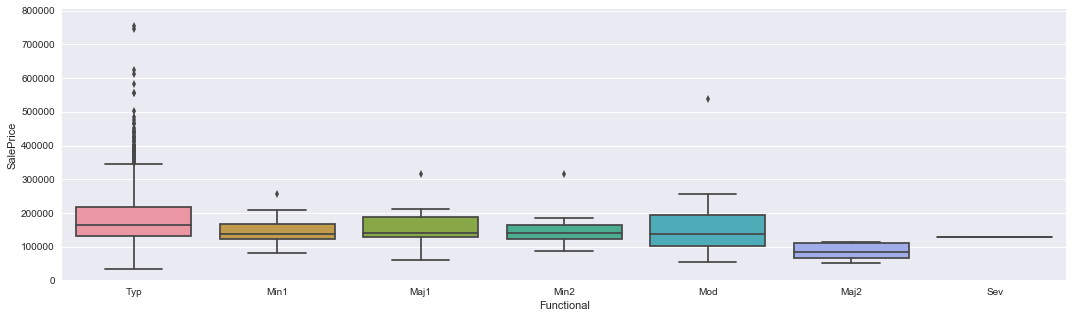

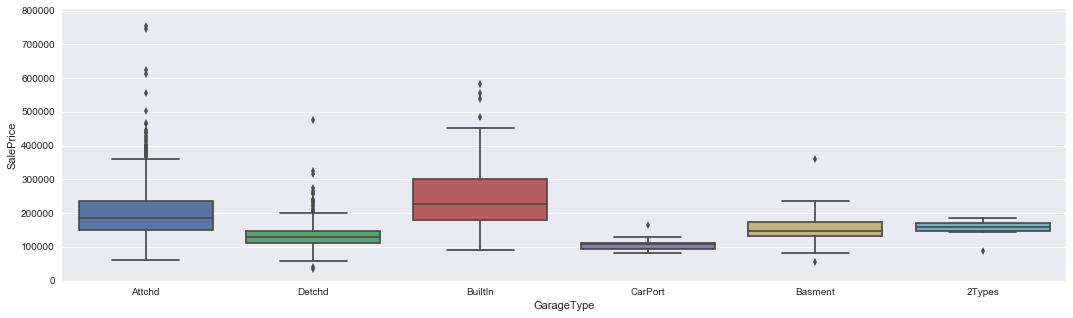

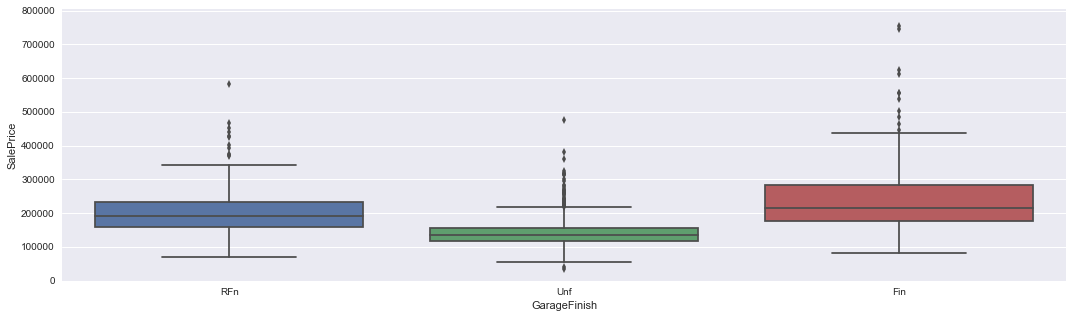

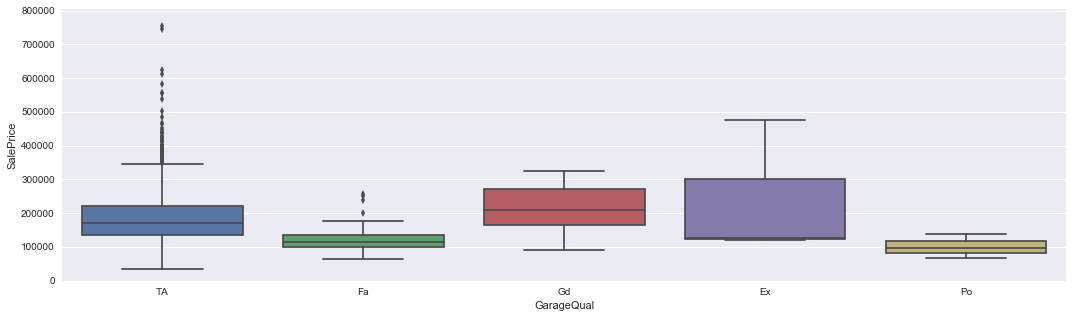

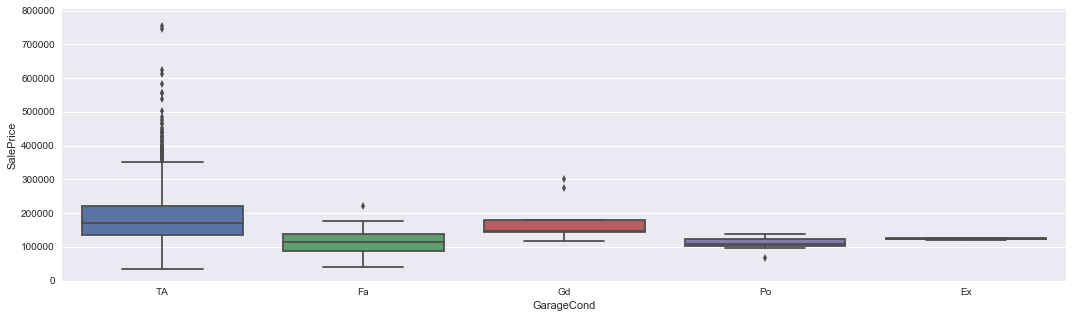

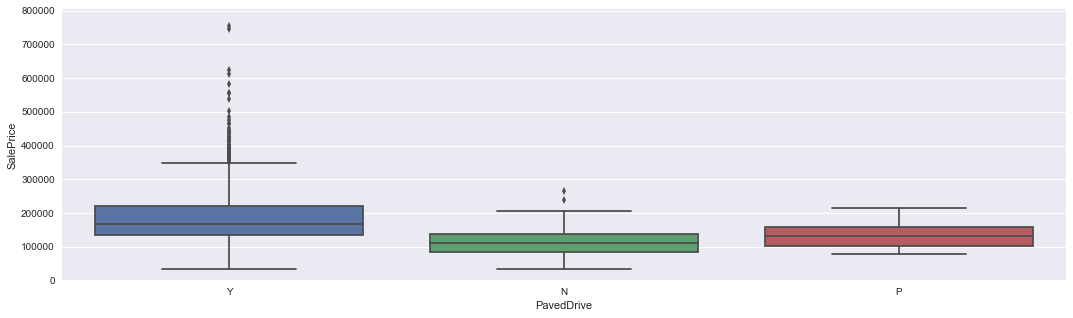

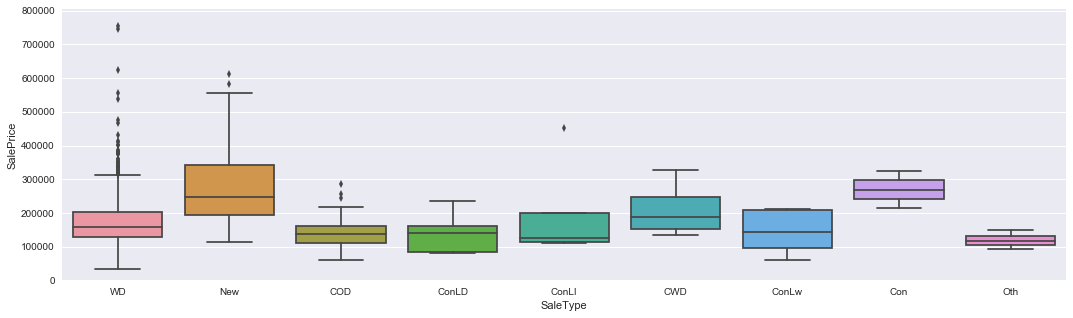

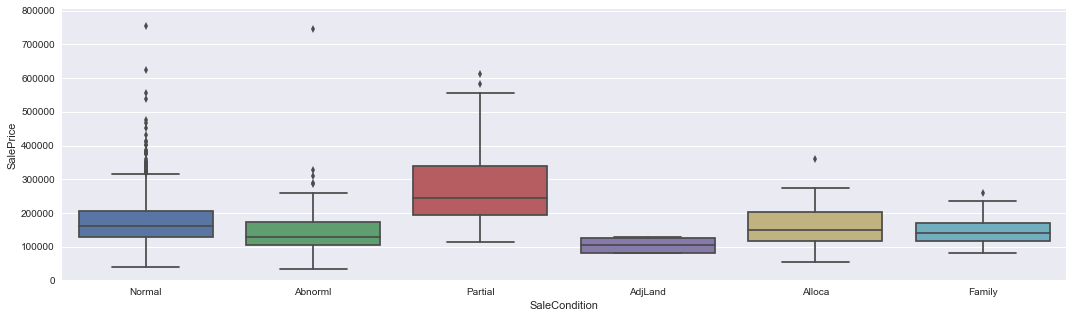

In [12]:
# 定性的データの分布
SaleMax = train_2['SalePrice'].max()
print(SaleMax)
for col in str_col:
    data = pd.concat([train_2['SalePrice'], train_2[col]], axis=1)
    f, ax = plt.subplots(figsize=(18, 5))
    fig = sns.boxplot(x=col, y="SalePrice", data=data)
    fig.axis(ymax=SaleMax+50000)

In [13]:
# 変数を追加
S = train_2['YrSold'] - train_2['YearBuilt']
S2 = train_2['YrSold'] - train_2['GarageYrBlt']
S3 = train_2['1stFlrSF'] + train_2['2ndFlrSF']
S4 = train_2['YrSold'] - train_2['YearRemodAdd']
S.name = 'Year'
S2.name = 'GYear'
S3.name = 'TotalFlrSF'
S4.name = 'ReYear'
train_3 = pd.concat([train_2, S, S2, S3, S4], axis = 1)

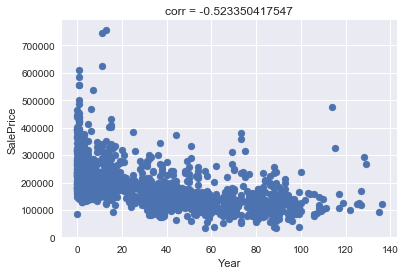

In [14]:
plt.scatter(train_3['Year'],train_3['SalePrice'])
plt.xlabel('Year')
plt.ylabel('SalePrice')
plt.title("corr = " +str(calc_corr(train_3['Year'],train_3['SalePrice'])))

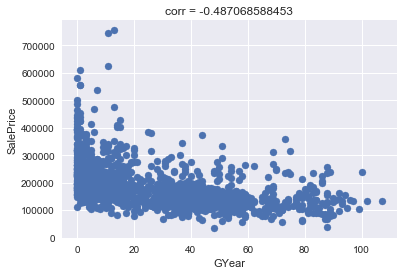

In [15]:
plt.scatter(train_3['GYear'],train_3['SalePrice'])
plt.xlabel('GYear')
plt.ylabel('SalePrice')
plt.title("corr = " +str(calc_corr(train_3['GYear'],train_3['SalePrice'])))

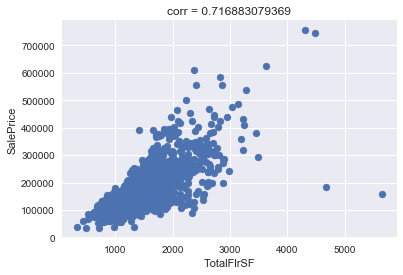

In [16]:
plt.scatter(train_3['TotalFlrSF'],train_3['SalePrice'])
plt.xlabel('TotalFlrSF')
plt.ylabel('SalePrice')
plt.title("corr = " +str(calc_corr(train_3['TotalFlrSF'],train_3['SalePrice'])))

In [17]:
# 外れ値2つを除外
train_3_c = train_3[train_3['TotalFlrSF'] > 4000]
train_3_c = train_3_c[train_3_c['SalePrice'] < 200000]
train_3_c

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Year,GYear,TotalFlrSF,ReYear
523,524,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,...,0,10,2007,New,Partial,184750,0,0.0,4676,-1
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,1,2008,New,Partial,160000,0,0.0,5642,0


In [18]:
train_4 = train_3.drop([523, 1298])

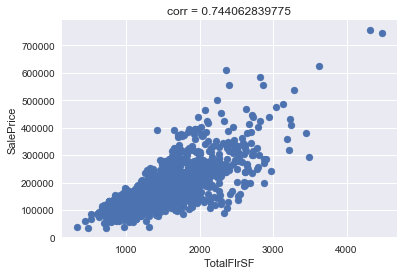

In [19]:
plt.scatter(train_4['TotalFlrSF'],train_4['SalePrice'])
plt.xlabel('TotalFlrSF')
plt.ylabel('SalePrice')
plt.title("corr = " +str(calc_corr(train_4['TotalFlrSF'],train_4['SalePrice'])))

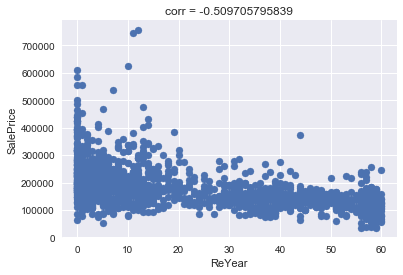

In [20]:
plt.scatter(train_4['ReYear'],train_4['SalePrice'])
plt.xlabel('ReYear')
plt.ylabel('SalePrice')
plt.title("corr = " +str(calc_corr(train_4['ReYear'],train_4['SalePrice'])))

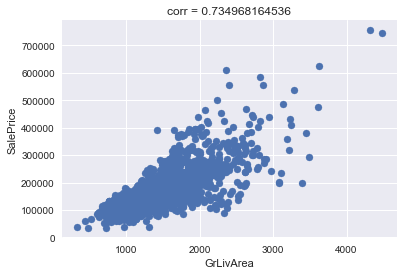

In [21]:
plt.scatter(train_4['GrLivArea'],train_4['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title("corr = " +str(calc_corr(train_4['GrLivArea'],train_4['SalePrice'])))

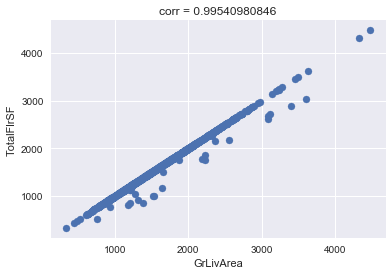

In [22]:
plt.scatter(train_4['GrLivArea'],train_4['TotalFlrSF'])
plt.xlabel('GrLivArea')
plt.ylabel('TotalFlrSF')
plt.title("corr = " +str(calc_corr(train_4['GrLivArea'],train_4['TotalFlrSF'])))

相関が強すぎる（それはそう）
今回は'TotalFlrSF'を採用

In [23]:
# testも加工
tS = test_2['1stFlrSF'] + test_2['2ndFlrSF']
tS.name = 'TotalFlrSF'
test_3 = pd.concat([test_2, tS], axis = 1)

In [24]:
# qualのmapping
train_5 = train_4.copy()
test_5 = test_3.copy()
qual_mapping = {'Ex':2, 'Gd':1, 'TA':0, 'Fa':0}
train_5['ExterQual'] = train_4['ExterQual'].map(qual_mapping)
test_5['ExterQual'] = test_3['ExterQual'].map(qual_mapping)
train_5['BsmtQual'] = train_4['BsmtQual'].map(qual_mapping)
test_5['BsmtQual'] = test_3['BsmtQual'].map(qual_mapping)

In [25]:
# 混合行列をグラフでプロットする関数
def plot_cm(confmat):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.title('predicted label')
    plt.ylabel('true label')
    plt.tight_layout() # ラベルが重ならないように自動調整
    plt.show()

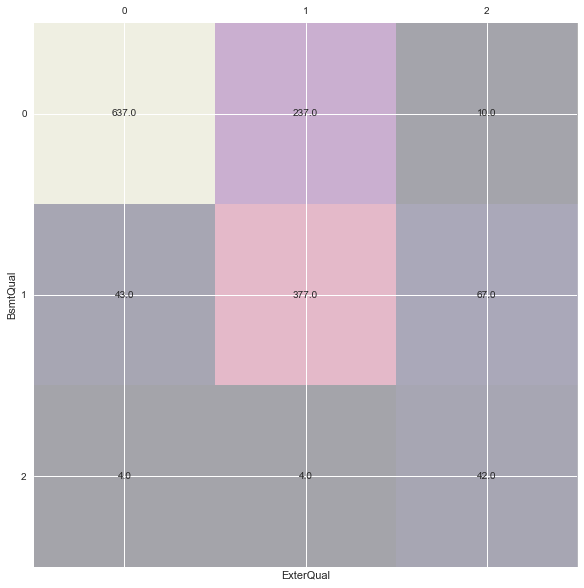

In [26]:
# qualの二変数の相関係数を見る
mat=np.zeros((3,3))

train_5_drop = train_5.dropna(subset=['ExterQual', 'BsmtQual'])

for idx in range(train_5_drop.shape[0]):
    df = train_5_drop.iloc[idx, :]
    i = df['ExterQual']
    j = df['BsmtQual']
    j = int(j)
    mat[i][j] += 1

fig, ax = plt.subplots(figsize=(10, 10))
plt.xlabel('ExterQual')
plt.ylabel('BsmtQual')
ax.matshow(mat, alpha=0.3, cmap = 'magma')
for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            ax.text(x=j, y=i, s=mat[i, j], va='center', ha='center')

強い相関はなさげなので両方このまま用いる

In [27]:
# 使用する特徴量
feat_list = ['TotalFlrSF', 'OverallQual', 'ExterQual', 'BsmtQual']

In [28]:
# 学習用データ
X = train_5.loc[:, feat_list]
y = train_5.loc[:, ['SalePrice']]
# 提出用データ
test_f = test_5.loc[:, feat_list]

# 欠損値補完
for f in feat_list:
    X[f] = X[f].fillna(X[f].mean())
    test_f[f] = test_f[f].fillna(test_f[f].mean())                         

In [29]:
from sklearn.preprocessing import StandardScaler
# データの標準化
scaler = StandardScaler()
X_std = scaler.fit_transform(X.values)

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr2 = LinearRegression()

In [31]:
# 自由度調整済み決定係数
# (決定係数, trainまたはtestのサンプル数, 利用した特徴量の数)
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 0)

In [33]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
print('adjusted R^2')
print('train: %3f' % adjusted(lr.score(X_train, y_train), len(y_train), 4))
print('test : %3f' % adjusted(lr.score(X_test, y_test), len(y_test), 4))

adjusted R^2
train: 0.774401
test : 0.809836


In [35]:
test_ff = scaler.fit_transform(test_f)

In [36]:
y_pred = lr.predict(test_ff)
y_pred = pd.Series(y_pred.reshape(-1))

In [37]:
from sklearn.metrics import mean_squared_error as mse

print('RMSE')
print('train: %.3f' % (mse(y_train, lr.predict(X_train)) ** (1/2)))
print('test : %.3f' % (mse(y_test, lr.predict(X_test)) ** (1/2)))

RMSE
train: 37034.273
test : 35814.585


In [38]:
train_1.describe()['SalePrice']

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

RMSEが標準偏差の半分ほどなので過学習してはなさそう

In [39]:
# 提出csvファイルの作成
submit_file = pd.DataFrame({'Id' : test_1['Id'], 'SalePrice' : y_pred})
submit_file.to_csv('submit.csv', index = False)

これでスコア2.0くらい

(array([  1.,   2.,   1.,   0.,   0.,   0.,   1.,   2.,   3.,   3.,   2.,
          1.,   3.,  14.,  16.,  14.,  15.,  20.,  36.,  34.,  49.,  70.,
         85.,  60.,  68.,  61.,  82.,  58.,  46.,  39.,  46.,  34.,  33.,
         28.,  16.,  21.,  14.,   9.,  10.,   7.,   5.,   2.,   4.,   1.,
          0.,   1.,   1.,   0.,   0.,   2.]),
 array([ 10.46027076,  10.52175483,  10.5832389 ,  10.64472298,
         10.70620705,  10.76769112,  10.82917519,  10.89065926,
         10.95214334,  11.01362741,  11.07511148,  11.13659555,
         11.19807962,  11.25956369,  11.32104777,  11.38253184,
         11.44401591,  11.50549998,  11.56698405,  11.62846813,
         11.6899522 ,  11.75143627,  11.81292034,  11.87440441,
         11.93588849,  11.99737256,  12.05885663,  12.1203407 ,
         12.18182477,  12.24330884,  12.30479292,  12.36627699,
         12.42776106,  12.48924513,  12.5507292 ,  12.61221328,
         12.67369735,  12.73518142,  12.79666549,  12.85814956,
         12.919633

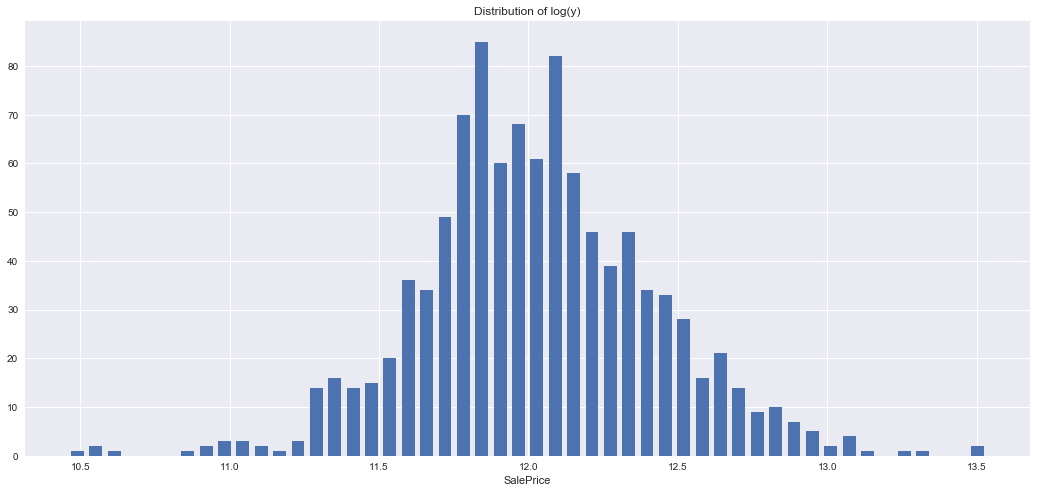

In [40]:
# もう少し粘る
# yの対数変換
y_train_log = np.log1p(y_train["SalePrice"])
y_test_log = np.log1p(y_test["SalePrice"])
#対数変換後の分布を確認
plt.figure(figsize=(18,8)) #figsize
plt.xlabel(var) # x軸のラベルを表示
plt.title("Distribution of log(y)")
plt.hist(y_train_log,bins=50,rwidth=0.7)

正規分布に近づいた

In [41]:
lr2.fit(X_train, y_train_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
print('adjusted R^2')
print('train: %3f' % adjusted(lr2.score(X_train, y_train_log), len(y_train), 4))
print('test : %3f' % adjusted(lr2.score(X_test, y_test_log), len(y_test), 4))

adjusted R^2
train: 0.774097
test : 0.828395


In [43]:
# expで戻すのを忘れない
y_pred_2 = np.expm1(lr2.predict(test_ff))
y_pred_2 = pd.Series(y_pred_2.reshape(-1))

In [44]:
# 提出csvファイルの作成
submit_file = pd.DataFrame({'Id' : test_1['Id'], 'SalePrice' : y_pred_2})
submit_file.to_csv('submit2.csv', index = False)